# A. Introduction

### A.1.Description & Discussion of the Background

The primary issue that is affecting the world nowadays is COVID-19. No country has been left untouched. 
It is a deadly infectious disease that the world has never witnessed before. It is responsible for the 
loss of many lives and left the affected countries in both deep physical and economic depression. 

This all started in December 2019 in Wuhan, China. Since then it has spread globally at an alarming rate.
As a result, the World Health Organization declared the COVID‑19 outbreak as a pandemic on March 11, 2020.
As of June 21, 2020, more than 8.9 million cases have been reported across 188 countries and territories,
resulting in more than 414k deaths. It is an infectious disease caused by severe acute respiratory 
syndrome coronavirus 2 (SARS-CoV-2). People who are affected by this virus experience 
fever, cough, fatigue, shortness of breath, and loss of smell and taste. 
There is no vaccine yet, which means the only method of prevention is through self-quarantine.

Considering the distressful situation that the world is in, I believe that selecting COVID-19 as my topic makes the most sense. So it's my mere effort to 
analyze the cumulative data of confirmed cases, deaths, and recovered cases over time. My main focus is 
to analyze the spread trend of this virus all over the world with the right visualizations and also to 
cluster the countries affected accordingly.

We need to build the courage and act in harmony and peace to fight against this situation, 
hoping to see the world smile again overcoming the fear of death.

### A.2. Data Description

In consideration of the COVID 19 problem I have found Open data  available through reliable
sources:

I  have found  Time-series  COVID-19 Data Repository by the Center for Systems Science and 
Engineering (CSSE) at Johns Hopkins University, the repository has several datasets, among 
those I will be using dataset featuring the confirmed cases, no of deaths, and active cases
by countries, I will be downloading, preprocessing the data, and creating a World map 
featuring the COVID-19 stats by countries.

I will also be analyzing the USA country separately, I  have found a Time series dataset 
which also comes from a public dataset by NYT, located in the GitHub, this dataset provides
information on COVID-19 cases per US counties. I will be creating maps to display the stats
by counties.

I will be using the Foursquare API's to analyze single county to see the most affected 
venues by this pandemic.

I will be creating visualization maps featuring the effects of COVID19.

# B.Methodology

### B.1.Import necessary Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

print('Geopy installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         393 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.5               |   py36h830a2c2_0        10.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-

In [4]:
pip install tabula-py

     |████████████████████████████████| 10.4MB 1.3MB/s eta 0:00:013.5MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tabula import read_pdf

### Analyzing Countries affected by CoronaVirus

##### Let's download the data and read into Pandas dataframe.

In [6]:
df_Covid_Countries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [7]:
df_Covid_Countries.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-06-22 02:33:17,-25.0000,133.0000,7474.0,102.0,6903.0,469.0,29.356198,NaN,NaN,1.364731,36,AUS
1,Austria,2020-06-22 02:33:17,47.5162,14.5501,17341.0,690.0,16197.0,454.0,192.540860,NaN,NaN,3.979009,40,AUT
2,Canada,2020-06-22 02:33:17,60.0010,-95.0010,103078.0,8482.0,65249.0,29348.0,272.291873,NaN,NaN,8.228720,124,CAN
3,China,2020-06-22 02:33:17,30.5928,114.3055,84572.0,4639.0,79535.0,398.0,6.020746,NaN,NaN,5.485267,156,CHN
4,Denmark,2020-06-22 02:33:17,56.2639,9.5018,12591.0,600.0,11482.0,509.0,217.378431,NaN,NaN,4.765309,208,DNK


In [8]:
df_Covid_Countries.shape

(188, 14)

In [9]:
Column_Names=['Country_Region','Confirmed','Deaths','Recovered','Active']
df_Covid_Countries_new=df_Covid_Countries[Column_Names]
df_Covid_Countries_new.head()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Australia,7474.0,102.0,6903.0,469.0
1,Austria,17341.0,690.0,16197.0,454.0
2,Canada,103078.0,8482.0,65249.0,29348.0
3,China,84572.0,4639.0,79535.0,398.0
4,Denmark,12591.0,600.0,11482.0,509.0


In [10]:
df_Covid_Countries_new.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
df_Covid_Countries_new.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country_Region,Confirmed,Deaths,Recovered,Active
17,US,2279875.0,119969.0,622133.0,1463499.0
21,Brazil,1083341.0,50591.0,588118.0,444632.0
13,Russia,583879.0,8101.0,339142.0,236636.0
26,India,410461.0,13254.0,227756.0,169451.0
16,United Kingdom,305803.0,42717.0,1319.0,261767.0


In [11]:
# get the top 10 entries
df_top10 = df_Covid_Countries_new.head(10)
#df_top10.set_index('Country_Region',inplace=True)
df_top10

,Country_Region,Confirmed,Deaths,Recovered,Active
17,US,2279875.0,119969.0,622133.0,1463499.0
21,Brazil,1083341.0,50591.0,588118.0,444632.0
13,Russia,583879.0,8101.0,339142.0,236636.0
26,India,410461.0,13254.0,227756.0,169451.0
16,United Kingdom,305803.0,42717.0,1319.0,261767.0
22,Peru,251338.0,7861.0,141967.0,101510.0
18,Spain,246272.0,28323.0,150376.0,67573.0
20,Chile,242355.0,4479.0,200569.0,37307.0
10,Italy,238499.0,34634.0,182893.0,20972.0
96,Iran,204952.0,9623.0,163591.0,31738.0


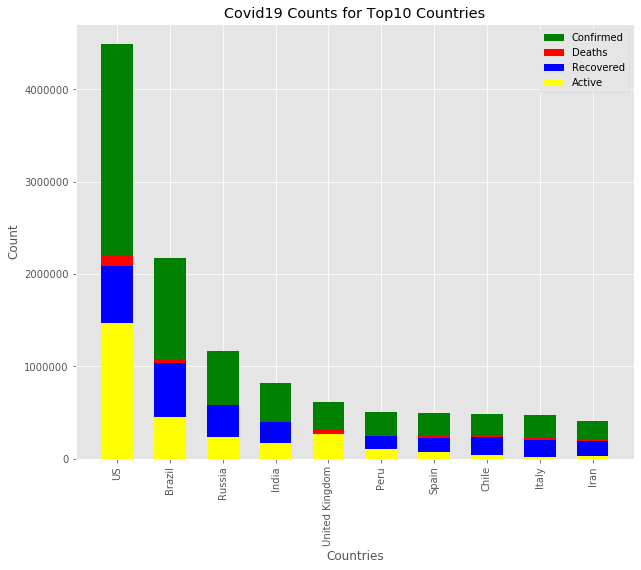

In [12]:
countries = df_top10['Country_Region']
Confirmed = np.array(df_top10['Confirmed'])
Deaths = np.array(df_top10['Deaths'])
Recovered = np.array(df_top10['Recovered'])
Active = np.array(df_top10['Active'])
ind = [country for country in countries]

plt.figure(figsize=(10, 8))
plt.bar(ind, Confirmed, width=0.6, label='Confirmed', color='green', bottom=Deaths+Recovered+Active)
plt.bar(ind, Deaths, width=0.6, label='Deaths', color='Red', bottom=Recovered+Active)
plt.bar(ind, Recovered, width=0.6, label='Recovered', color='blue',bottom=Active)
plt.bar(ind, Active, width=0.6, label='Active', color='yellow')
 
plt.xticks(ind, countries, fontsize=10, rotation=90)
plt.ylabel("Count")
plt.xlabel("Countries")
plt.legend()
plt.title("Covid19 Counts for Top10 Countries")
plt.show()

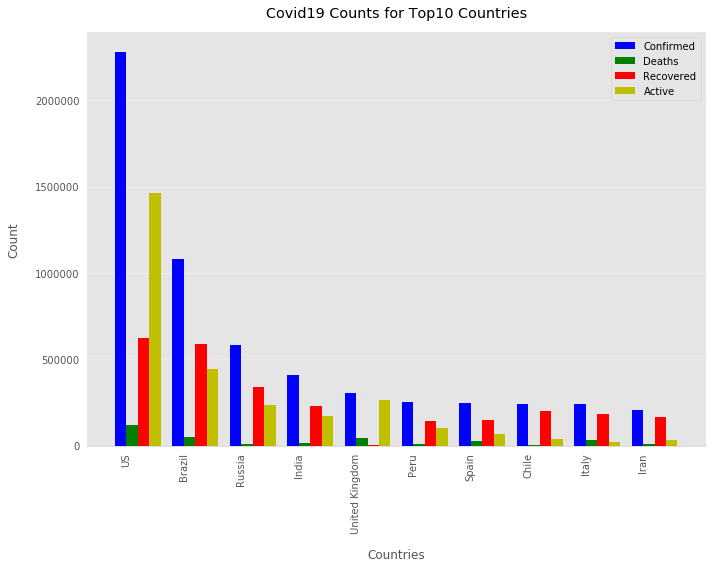

In [13]:
# data to plot
Confirmed = np.array(df_top10['Confirmed'])
Deaths = np.array(df_top10['Deaths'])
Recovered = np.array(df_top10['Recovered'])
Active = np.array(df_top10['Active'])
countries = df_top10['Country_Region']

# create plot
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(len(df_top10['Country_Region']))
bar_width = 0.20

b1 = ax.bar(index, Confirmed, width=bar_width,color='b',label="Confirmed")
b2 = ax.bar(index + bar_width, Deaths, width=bar_width,color='g',label='Deaths')
b3 = ax.bar(index + bar_width*2, Recovered, width=bar_width,color='r',label='Recovered')
b4 = ax.bar(index + bar_width*3, Active, width=bar_width,color='y',label='Active')

# Fix the x-axes.
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(countries,rotation=90)

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Countries', labelpad=15)
ax.set_ylabel('Count', labelpad=15)
ax.set_title('Covid19 Counts for Top10 Countries', pad=15)

fig.tight_layout()

In [14]:
df_World_Covid19 = df_Covid_Countries.drop(["People_Tested","People_Hospitalized","UID","ISO3"],axis =1)
df_World_Covid19['Mortality_Rate']=(df_World_Covid19['Mortality_Rate']).round(2).astype(str)+'%'

df_World_Covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
0,Australia,2020-06-22 02:33:17,-25.0000,133.0000,7474.0,102.0,6903.0,469.0,29.356198,1.36%
1,Austria,2020-06-22 02:33:17,47.5162,14.5501,17341.0,690.0,16197.0,454.0,192.540860,3.98%
2,Canada,2020-06-22 02:33:17,60.0010,-95.0010,103078.0,8482.0,65249.0,29348.0,272.291873,8.23%
3,China,2020-06-22 02:33:17,30.5928,114.3055,84572.0,4639.0,79535.0,398.0,6.020746,5.49%
4,Denmark,2020-06-22 02:33:17,56.2639,9.5018,12591.0,600.0,11482.0,509.0,217.378431,4.77%


In [15]:
df_Covid_Countries=df_Covid_Countries.dropna(subset=['Long_'])

In [16]:
df_Covid_Countries=df_Covid_Countries.dropna(subset=['Lat'])

In [17]:
# create World map usimg latitude and longitude values
latitude=21.00
longitude=78.00
map_World = folium.Map(location=[latitude, longitude],tiles='OpenStreetMap', zoom_start=3)

# add markers to map
for lat, lng, confirmed,deaths,countryRegion ,mortalityRate in zip(df_Covid_Countries['Lat'], df_Covid_Countries['Long_'], df_Covid_Countries['Confirmed'], df_Covid_Countries['Deaths'],
                                                                   df_Covid_Countries['Country_Region'],df_World_Covid19['Mortality_Rate']):
    label = ('Country: {}  , Confirmed: {}       , Deaths: {} ,Mortality_Rate: {}'.format(countryRegion,confirmed,deaths,mortalityRate))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        Reset=True,
        parse_html=False).add_to(map_World)  
map_World


### Analysing and Downloading US country's data
This data comes from a public dataset by NYT, located in GitHub.
The dataset provides information on COVID-19 cases per US counties.

In [18]:
df_US_Counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [19]:
df_US_Counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


FIPS 6-4) is a five-digit Federal Information Processing Standards code which uniquely identifies counties and county equivalents in the United States

### Preprocessing of Data

In [20]:
df_US_Counties.shape

(254980, 6)

In [21]:
import numpy as np
df_US_Counties = df_US_Counties.replace('Not assigned',np.nan, regex=True)
df_US_Counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [22]:
df_US_Counties.shape

(254980, 6)

In [23]:
df_US_Counties.dropna(subset=['county'],  axis=0,inplace=True)
df_US_Counties = df_US_Counties.reset_index(drop=True)
df_US_Counties.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


In [24]:
df_US_Counties.sort_values(['date'], ascending=False, axis=0, inplace=True)
df_US_Counties.head()

,date,county,state,fips,cases,deaths
254979,2020-06-20,Weston,Wyoming,56045.0,1,0
252945,2020-06-20,Hancock,Kentucky,21091.0,14,0
252954,2020-06-20,Jackson,Kentucky,21109.0,90,13
252953,2020-06-20,Hopkins,Kentucky,21107.0,233,34
252952,2020-06-20,Hickman,Kentucky,21105.0,5,0


### Getting # of Cases and Deaths by States

In [25]:
df_Total=(df_US_Counties.groupby(
   ['county','state'],as_index=False
).agg(
    {
         'cases':max,    # Sum of cases
         'deaths':max  # get the count of deaths
    }
)).groupby(
['state'],as_index=False
).agg(
    {
         'cases':sum,    # Sum of cases
         'deaths':sum  # get the count of deaths
    })
df_Total.head()

,state,cases,deaths
0,Alabama,29675,840
1,Alaska,847,10
2,Arizona,50199,1360
3,Arkansas,15145,232
4,California,174863,5500


In [26]:
df_Total.shape

(55, 3)

In [27]:
df_Texas_Counties=df_US_Counties[df_US_Counties['state']=="Texas"]
df_Texas_Counties.head()

,date,county,state,fips,cases,deaths
254469,2020-06-20,Hale,Texas,48189.0,135,5
254478,2020-06-20,Haskell,Texas,48207.0,4,0
254477,2020-06-20,Hartley,Texas,48205.0,13,2
254476,2020-06-20,Harrison,Texas,48203.0,271,32
254475,2020-06-20,Harris,Texas,48201.0,20874,322


In [28]:
df_TX_Total=(df_Texas_Counties.groupby(
   ['county'],as_index=False
).agg(
    {
         'cases':max,    # Sum of cases
         'deaths':max  # get the count of deaths
    }
)).groupby(
['county'],as_index=False
).agg(
    {
         'cases':sum,    # Sum of cases
         'deaths':sum  # get the count of deaths
    })
df_TX_Total.head()

,county,cases,deaths
0,Anderson,1007,2
1,Andrews,42,0
2,Angelina,380,6
3,Aransas,7,0
4,Archer,3,0


In [29]:
df_TX_Total.sort_values(['cases'], ascending=False, axis=0, inplace=True)
df_Top10_TX=df_TX_Total.head(10)
df_Top10_TX['Death Percent']=((df_TX_Total['deaths'])/(df_TX_Total['cases'])).mul(100).round(2).astype(str)+'%'
df_Top10_TX.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,county,cases,deaths,Death Percent
97,Harris,20874,322,1.54%
55,Dallas,16437,313,1.9%
207,Tarrant,8511,208,2.44%
14,Bexar,6356,96,1.51%
213,Travis,5704,109,1.91%
67,El Paso,4340,120,2.76%
75,Fort Bend,2951,50,1.69%
177,Potter,2822,39,1.38%
41,Collin,2189,38,1.74%
60,Denton,2113,36,1.7%


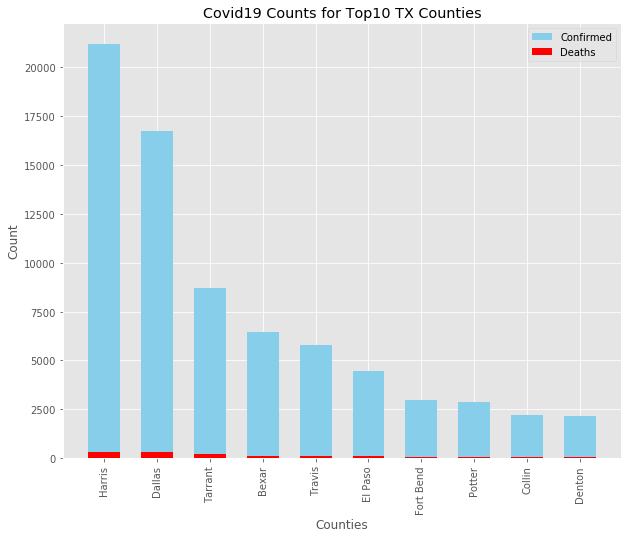

In [30]:
counties = df_Top10_TX['county']
Cases = np.array(df_Top10_TX['cases'])
Deaths = np.array(df_Top10_TX['deaths'])
Death_per = np.array(df_Top10_TX['Death Percent'])
ind = [county for county in counties]

plt.figure(figsize=(10, 8))
plt.bar(ind, Cases, width=0.6, label='Confirmed', color='skyblue', bottom=Deaths)
plt.bar(ind, Deaths, width=0.6, label='Deaths', color='Red')

 
plt.xticks(ind, counties, fontsize=10, rotation=90)
plt.ylabel("Count")
plt.xlabel("Counties")
plt.legend()
plt.title("Covid19 Counts for Top10 TX Counties")
plt.show()

In [31]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 5.8MB/s ta 0:00:011
     |████████████████████████████████| 92kB 12.4MB/s eta 0:00:01
     |████████████████████████████████| 829kB 8.1MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


In [32]:
address1 = "US"
address2="Alabama"
address=address1+","+address2
g=geocoder.arcgis(address)
print("address",address)
print('The geograpical coordinate of Alabama are {}, {}.'.format(g.latlng[0], g.latlng[1]))

address US,Alabama
The geograpical coordinate of Alabama are 32.766542541000035, -86.84028685899995.


In [33]:
df_Total.columns

Index(['state', 'cases', 'deaths'], dtype='object')

In [34]:
AA=[]
BB=[]
CC=[]
Lat_list=[]
Lng_list=[]

for i in range(0,len(df_Total['cases'])):
    address1="US"
    address2=df_Total.loc[i]['state']
    address=address1+","+address2
    g=geocoder.arcgis(address)
    #geolocator = Nominatim(user_agent="US_explorer")
    #location = geolocator.geocode(address1,address2)
    AA.append(df_Total.iloc[i]['state'])
    BB.append(df_Total.iloc[i]['cases'])
    CC.append(df_Total.iloc[i]['deaths'])
    Lat_list.append(g.latlng[0])
    Lng_list.append(g.latlng[1])

In [35]:
import pandas as pd
df_Total_USA=pd.DataFrame(AA,columns=['state'])
df_Total_USA['cases']=BB
df_Total_USA['Deaths']=CC
df_Total_USA['States Percent']=((df_Total_USA['Deaths'])/(df_Total_USA['cases'])).mul(100).round(2).astype(str)+'%'
df_Total_USA['Latitude']=Lat_list
df_Total_USA['Longitude']=Lng_list
df_Total_USA.head()

,state,cases,Deaths,States Percent,Latitude,Longitude
0,Alabama,29675,840,2.83%,32.766543,-86.840287
1,Alaska,847,10,1.18%,64.808088,-151.004158
2,Arizona,50199,1360,2.71%,34.293016,-111.664754
3,Arkansas,15145,232,1.53%,34.899924,-92.438885
4,California,174863,5500,3.15%,36.374106,-119.270230


In [36]:
# create map and display it
S_latitude=31.462733
S_longitude=-99.333050
USA_Covid_Count_map = folium.Map(location=[S_latitude, S_longitude], zoom_start=4)
for i in range(0,len(df_Total_USA['cases'])):
    folium.CircleMarker(
        location=[df_Total_USA.iloc[i]['Latitude'], df_Total_USA.iloc[i]['Longitude']], 
        radius=5,
        popup = ('State: ' + str(df_Total_USA.iloc[i]['state']) + '<br>'
                 'Total Cases: ' + str(df_Total_USA.iloc[i]['cases'])+ '<br>'
                 'Total Deaths: ' + str(df_Total_USA.iloc[i]['Deaths'])+ '<br>'
                 'Percent of Deaths:'+ str(df_Total_USA.iloc[i]['States Percent'])
                ) ,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        reset=True
    ).add_to(USA_Covid_Count_map)

USA_Covid_Count_map

In [37]:
Column_Names=['state','cases','Deaths']
df_Covid_US_new=df_Total_USA[Column_Names]
df_Covid_US_new.sort_values(['Deaths'], ascending=False, axis=0, inplace=True)
df_US_top10=df_Covid_US_new.head(10)
#df_US_top10.set_index('state',inplace=True)
df_US_top10

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,cases,Deaths
33,New York,394128,32016
31,New Jersey,173061,12882
22,Massachusetts,107621,7833
14,Illinois,137556,6850
40,Pennsylvania,85682,6485
23,Michigan,68224,6117
4,California,174863,5500
6,Connecticut,46055,4261
9,Florida,93790,3180
21,Maryland,64583,3165


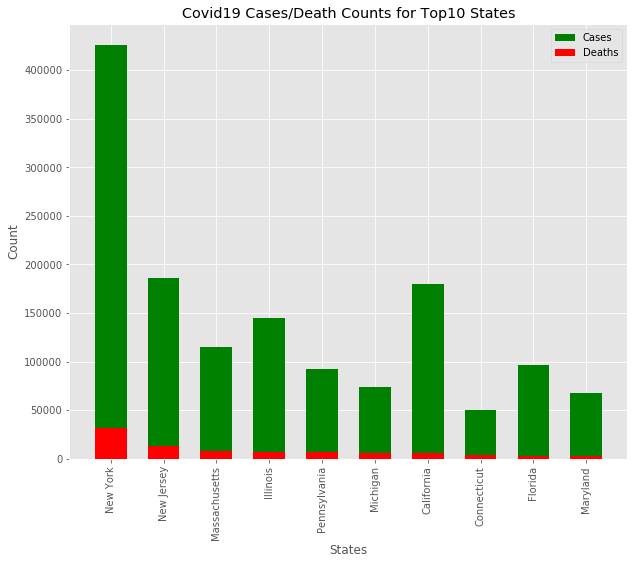

In [38]:
States = df_US_top10['state']
Confirmed = np.array(df_US_top10['cases'])
Deaths = np.array(df_US_top10['Deaths'])
ind = [state for state in States]

plt.figure(figsize=(10, 8))
plt.bar(ind, Confirmed, width=0.6, label='Cases', color='green', bottom=Deaths)
plt.bar(ind, Deaths, width=0.6, label='Deaths', color='Red')

plt.xticks(ind, States, fontsize=10, rotation=90)
plt.ylabel("Count")
plt.xlabel("States")
plt.legend()
plt.title("Covid19 Cases/Death Counts for Top10 States")
plt.show()

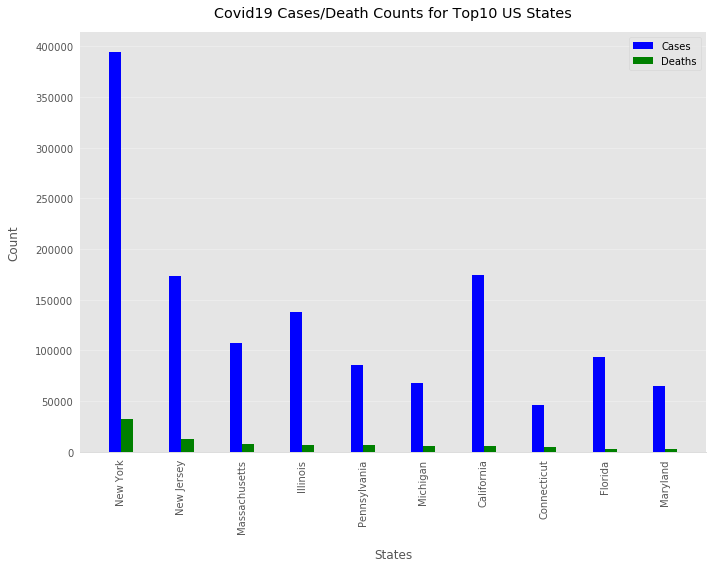

In [39]:
# data to plot
Confirmed = np.array(df_US_top10['cases'])
Deaths = np.array(df_US_top10['Deaths'])
States = df_US_top10['state']

# create plot
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(len(df_US_top10['state']))
bar_width = 0.20

b1 = ax.bar(index, Confirmed, width=bar_width,color='b',label="Cases")
b2 = ax.bar(index + bar_width, Deaths, width=bar_width,color='g',label='Deaths')

# Fix the x-axes.
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(States,rotation=90)

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('States', labelpad=15)
ax.set_ylabel('Count', labelpad=15)
ax.set_title('Covid19 Cases/Death Counts for Top10 US States', pad=15)

fig.tight_layout()

### Analysing Dallas County and its Cities 

In [40]:
address1 = "Dallas"
address2="Texas"
address=address1+","+address2
gg=geocoder.arcgis(address)
DallasCounty_latitude=gg.latlng[0]
DallasCounty_longitude=gg.latlng[1]
print("address",address)
print('The geograpical coordinate of Dallas, Texas are {}, {}.'.format(DallasCounty_latitude, DallasCounty_longitude))

address Dallas,Texas
The geograpical coordinate of Dallas, Texas are 32.77822000000003, -96.79511999999994.


Dallas City Distribution of Cases by cities, this file is downloaded locally as the file is not 
updated regularly

In [41]:
#declare the path of your file
#file_path = "https://www.dallascounty.org/Assets/uploads/docs/covid-19/hhs-summary/PCCI-C19-CityDistribution-20200616.pdf"
file_path = "PCCI-C19-CityDistribution-20200618.pdf"
#Convert your file
df_PDF = read_pdf(file_path,pages=1)
df_PDF

Got stderr: Jun 22, 2020 3:13:31 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Jun 22, 2020 3:13:31 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jun 22, 2020 3:13:32 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jun 22, 2020 3:13:32 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jun 22, 2020 3:13:36 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jun 22, 2020 3:13:40 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



[               City  Patient Count Percent
 0           Addison             55      0%
 1     Balch Springs            140      1%
 2        Carrollton            262      2%
 3        Cedar Hill            211      1%
 4     Cockrell Hill             28      0%
 5           Combine              2      0%
 6           Coppell             58      0%
 7            Dallas           8706     56%
 8            DeSoto            269      2%
 9       Duncanville            241      2%
 10   Farmers Branch            185      1%
 11          Garland           1428      9%
 12    Glenn Heights             35      0%
 13    Grand Prairie            667      4%
 14    Highland Park             20      0%
 15         Hutchins             82      1%
 16           Irving           1596     10%
 17        Lancaster            238      2%
 18         Mesquite            823      5%
 19       Richardson            243      2%
 20          Rowlett            138      1%
 21           Sachse            

In [42]:
dft=df_PDF[0]
dft.head()

,City,Patient Count,Percent
0,Addison,55,0%
1,Balch Springs,140,1%
2,Carrollton,262,2%
3,Cedar Hill,211,1%
4,Cockrell Hill,28,0%


In [43]:
dft_mod1=dft[~dft['City'].isin(['Total','Not Reported'])]
dft_mod1

,City,Patient Count,Percent
0,Addison,55,0%
1,Balch Springs,140,1%
2,Carrollton,262,2%
3,Cedar Hill,211,1%
4,Cockrell Hill,28,0%
5,Combine,2,0%
6,Coppell,58,0%
7,Dallas,8706,56%
8,DeSoto,269,2%
9,Duncanville,241,2%


Dallas Population file extracted from census.gov

In [44]:
df_Dallas_popu = pd.read_csv('Dallas_Population.csv')
print('Data downloaded and read into a dataframe!')
df_Dallas_popu.head()

Data downloaded and read into a dataframe!


,City,Population
0,Addison,16404
1,Balch Springs,27001
2,Carrollton,135432
3,Cedar Hill,50552
4,Cockrell Hill,4660


In [45]:
dft_mod1.columns

Index(['City', 'Patient Count', 'Percent'], dtype='object')

In [46]:
df_Dallas_popu.columns

Index(['City', 'Population'], dtype='object')

##### Combining Dallas Population and # of Cases by Cities

In [47]:
df_Dallas_new = pd.merge(df_Dallas_popu,dft_mod1, how="inner", on=["City"])
df_Dallas_new.head()

,City,Population,Patient Count,Percent
0,Addison,16404,55,0%
1,Balch Springs,27001,140,1%
2,Carrollton,135432,262,2%
3,Cedar Hill,50552,211,1%
4,Cockrell Hill,4660,28,0%


In [48]:
AAA=[]
BBB=[]
CCC=[]
DDD=[]
Lat_list=[]
Lng_list=[]

for i in range(0,len(df_Dallas_new['City'])):
    address1=df_Dallas_new.loc[i]['City']
    address2="Texas"
    address=address1+","+address2
    g=geocoder.arcgis(address)
    #geolocator = Nominatim(user_agent="US_explorer")
    #location = geolocator.geocode(address1,address2)
    AAA.append(df_Dallas_new.iloc[i]['City'])
    BBB.append(address2)
    CCC.append(df_Dallas_new.iloc[i]['Population'])
    DDD.append(df_Dallas_new.iloc[i]['Patient Count'])
    Lat_list.append(g.latlng[0])
    Lng_list.append(g.latlng[1])

In [49]:
dft_DallasCounty=pd.DataFrame(AAA,columns=['City'])
dft_DallasCounty['State']=BBB
dft_DallasCounty['Population']=CCC
dft_DallasCounty['Patient Count']=DDD
dft_DallasCounty['Cases Percent']=((dft_DallasCounty['Patient Count'])/(dft_DallasCounty['Population'])).mul(100).round(2)
dft_DallasCounty['Latitude']=Lat_list
dft_DallasCounty['Longitude']=Lng_list
dft_DallasCounty.head()

,City,State,Population,Patient Count,Cases Percent,Latitude,Longitude
0,Addison,Texas,16404,55,0.34,32.95398,-96.81800
1,Balch Springs,Texas,27001,140,0.52,32.72709,-96.62263
2,Carrollton,Texas,135432,262,0.19,32.97555,-96.89023
3,Cedar Hill,Texas,50552,211,0.42,32.58866,-96.95596
4,Cockrell Hill,Texas,4660,28,0.60,32.73895,-96.89399


In [50]:
# create map of Dallas County using latitude and longitude values
latitude= 32.77
longitude=-96.79

map_Dallas_County = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, City,Population,pat_cnt,cs_per in zip(dft_DallasCounty['Latitude'], dft_DallasCounty['Longitude'], dft_DallasCounty['City'], 
                                                    dft_DallasCounty['Population'],dft_DallasCounty['Patient Count'],dft_DallasCounty['Cases Percent']):
    label = ('City:{}, Population:{}, Patient Count:{},Cases Percent:{}'.format(City,Population,pat_cnt,cs_per))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Dallas_County)  

map_Dallas_County

<a id='item4'></a>

### Lets define Foursquares to pull Hospital data

In [51]:
CLIENT_ID = 'JX2HTPHXOE2A1RWATZAC5NSNNE4DEKSL41MNPANODDXYMF2W' # your Foursquare ID
CLIENT_SECRET = 'YF2UGIID2ZJ1CMBA5QA1RZORTTPVS4Y234QLAMBRSHXS04MI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
HOSPITAL_KEY = "4bf58dd8d48988d196941735"

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('HOSPITAL_KEY:' + HOSPITAL_KEY)

Your credentails:
CLIENT_ID: JX2HTPHXOE2A1RWATZAC5NSNNE4DEKSL41MNPANODDXYMF2W
CLIENT_SECRET:YF2UGIID2ZJ1CMBA5QA1RZORTTPVS4Y234QLAMBRSHXS04MI
HOSPITAL_KEY:4bf58dd8d48988d196941735


In [52]:
LIMIT = 100
radius = 1000
url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&LIMIT={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION,DallasCounty_latitude, DallasCounty_longitude, radius, LIMIT,HOSPITAL_KEY)
url1


'https://api.foursquare.com/v2/venues/explore?client_id=JX2HTPHXOE2A1RWATZAC5NSNNE4DEKSL41MNPANODDXYMF2W&client_secret=YF2UGIID2ZJ1CMBA5QA1RZORTTPVS4Y234QLAMBRSHXS04MI&v=20180605&ll=32.77822000000003,-96.79511999999994&radius=1000&LIMIT=100&categoryId=4bf58dd8d48988d196941735'

Let's create a function to get venue categories for all the Cities in Dallas county

In [53]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            HOSPITAL_KEY)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [54]:
Dallas_County_venues = getNearbyVenues(names=dft_DallasCounty['City'],
                                    latitudes=dft_DallasCounty['Latitude'],
                                    longitudes=dft_DallasCounty['Longitude']
                                      )

Addison
Balch Springs
Carrollton
Cedar Hill
Cockrell Hill
Combine
Coppell
Dallas
DeSoto
Duncanville
Farmers Branch
Garland
Glenn Heights
Grand Prairie
Highland Park
Hutchins
Irving
Lancaster
Mesquite
Richardson
Rowlett
Sachse
Seagoville
Sunnyvale
University Park
Wilmer
Wylie


In [55]:
print(Dallas_County_venues.shape)
Dallas_County_venues.head()

(940, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Addison,32.95398,-96.818,The Heart Hospital Baylor Plano,33.014818,-96.789573,Hospital
1,Addison,32.95398,-96.818,Methodist Hopital For Surgery,32.984661,-96.829450,Hospital
2,Addison,32.95398,-96.818,Revivify Cranial Prosthesis Billing,32.949006,-96.824967,Hospital
3,Addison,32.95398,-96.818,Emergis ER & Urgent Care,32.956300,-96.820540,Hospital
4,Addison,32.95398,-96.818,Texas Health Presbyterian Hospital Dallas,32.881813,-96.763005,Hospital


In [56]:
print('There are {} uniques categories.'.format(len(Dallas_County_venues['Venue Category'].unique())))

There are 9 uniques categories.


In [57]:
Dallas_County_venues_mod=Dallas_County_venues.groupby('City').count()
Dallas_County_venues_mod

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Addison,100,100,100,100,100,100
Balch Springs,13,13,13,13,13,13
Carrollton,76,76,76,76,76,76
Cedar Hill,11,11,11,11,11,11
Cockrell Hill,59,59,59,59,59,59
Coppell,29,29,29,29,29,29
Dallas,100,100,100,100,100,100
DeSoto,17,17,17,17,17,17
Duncanville,18,18,18,18,18,18


In [58]:
Dallas_County_venues['Venue Category'].unique()

array(['Hospital', 'Medical Center', 'Alternative Healer',
       "Doctor's Office", 'Pharmacy', 'Veterinarian', 'Hospital Ward',
       'Emergency Room', "Dentist's Office"], dtype=object)

##### Dropping Alternative Healer,Pharmacy,Veterinarian,Dentist's Office.

In [59]:
Dallas_County_venues=Dallas_County_venues[~Dallas_County_venues['Venue Category'].isin(['Alternative Healer','Pharmacy','Veterinarian',"Dentist's Office"])]
Dallas_County_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Addison,32.95398,-96.818,The Heart Hospital Baylor Plano,33.014818,-96.789573,Hospital
1,Addison,32.95398,-96.818,Methodist Hopital For Surgery,32.984661,-96.829450,Hospital
2,Addison,32.95398,-96.818,Revivify Cranial Prosthesis Billing,32.949006,-96.824967,Hospital
3,Addison,32.95398,-96.818,Emergis ER & Urgent Care,32.956300,-96.820540,Hospital
4,Addison,32.95398,-96.818,Texas Health Presbyterian Hospital Dallas,32.881813,-96.763005,Hospital


In [60]:
Dallas_County_venues['Venue Category'].unique()

array(['Hospital', 'Medical Center', "Doctor's Office", 'Hospital Ward',
       'Emergency Room'], dtype=object)

In [61]:
Dallas_County_venues.shape

(916, 7)

In [64]:
print('There are {} uniques categories.'.format(len(Dallas_County_venues['Venue Category'].unique())))

There are 5 uniques categories.


##### Merging Dallas Population/Cases with # of Hospitals per each city

In [65]:
df_Dallas_new_Mod = pd.merge(dft_DallasCounty,Dallas_County_venues_mod, how="inner", on=["City"])
df_Dallas_new_Mod.head()

,City,State,Population,Patient Count,Cases Percent,Latitude,Longitude,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Addison,Texas,16404,55,0.34,32.95398,-96.81800,100,100,100,100,100,100
1,Balch Springs,Texas,27001,140,0.52,32.72709,-96.62263,13,13,13,13,13,13
2,Carrollton,Texas,135432,262,0.19,32.97555,-96.89023,76,76,76,76,76,76
3,Cedar Hill,Texas,50552,211,0.42,32.58866,-96.95596,11,11,11,11,11,11
4,Cockrell Hill,Texas,4660,28,0.60,32.73895,-96.89399,59,59,59,59,59,59


In [66]:
df_Dallas_new_Mod["Hospitals Per Hundred People"] = ((df_Dallas_new_Mod['Venue Category'])/(df_Dallas_new_Mod['Population']))*100
df_Dallas_new_Mod.head()

,City,State,Population,Patient Count,Cases Percent,Latitude,Longitude,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Hospitals Per Hundred People
0,Addison,Texas,16404,55,0.34,32.95398,-96.81800,100,100,100,100,100,100,0.609607
1,Balch Springs,Texas,27001,140,0.52,32.72709,-96.62263,13,13,13,13,13,13,0.048146
2,Carrollton,Texas,135432,262,0.19,32.97555,-96.89023,76,76,76,76,76,76,0.056117
3,Cedar Hill,Texas,50552,211,0.42,32.58866,-96.95596,11,11,11,11,11,11,0.021760
4,Cockrell Hill,Texas,4660,28,0.60,32.73895,-96.89399,59,59,59,59,59,59,1.266094


##### Dropping Some of Unnecessary columns

In [67]:
df_Dallas_new_Mod=df_Dallas_new_Mod.drop(['City Latitude','City Longitude','Venue','Venue Latitude','Venue Longitude'],axis=1)
df_Dallas_new_Mod.head()

,City,State,Population,Patient Count,Cases Percent,Latitude,Longitude,Venue Category,Hospitals Per Hundred People
0,Addison,Texas,16404,55,0.34,32.95398,-96.81800,100,0.609607
1,Balch Springs,Texas,27001,140,0.52,32.72709,-96.62263,13,0.048146
2,Carrollton,Texas,135432,262,0.19,32.97555,-96.89023,76,0.056117
3,Cedar Hill,Texas,50552,211,0.42,32.58866,-96.95596,11,0.021760
4,Cockrell Hill,Texas,4660,28,0.60,32.73895,-96.89399,59,1.266094


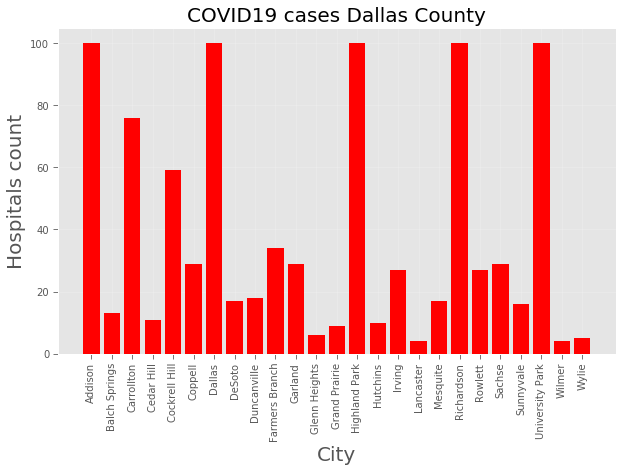

In [68]:
df_Dallas_new_Mod.plot(kind='bar',figsize=(10, 6))
index = np.arange(len(df_Dallas_new_Mod["City"]))
plt.axes(axisbelow=True)
plt.bar(index,df_Dallas_new_Mod["Venue Category"],color="red")
plt.tick_params(size=5,labelsize = 10)
plt.xlabel('City',fontsize=20) # add to x-label to the plot
plt.ylabel('Hospitals count',fontsize=20) # add y-label to the plot
plt.xticks(index,df_Dallas_new_Mod["City"], fontsize=10, rotation=90)
plt.title('COVID19 cases Dallas County',fontsize=20) # add title to the plot
plt.grid(alpha=0.2)

plt.show()

# Cluster Neighborhoods

In [69]:
df_clusters = df_Dallas_new_Mod.drop(['City', 'State', 'Latitude', 'Longitude', 'Venue Category'],axis = 1)

In [70]:
import sklearn
from sklearn.cluster import KMeans
df_clusters = sklearn.preprocessing.StandardScaler().fit_transform(df_clusters)
df_clusters

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.3894507 , -0.33350661, -0.32703038,  1.35453113],
       [-0.34973586, -0.28351708,  0.32413631, -0.4142661 ],
       [ 0.05663576, -0.2117674 , -0.86966929, -0.38915671],
       [-0.26147275, -0.24176112, -0.03762296, -0.49739303],
       [-0.43346421, -0.34938563,  0.61354373,  3.42269313],
       [-0.28744086, -0.33174227, -1.08672485, -0.35651291],
       [ 4.7168466 ,  4.75425111,  0.72207151, -0.5430971 ],
       [-0.24021554, -0.20765062,  0.1794326 , -0.47068935],
       [-0.29744734, -0.22411776,  0.5773678 , -0.42747721],
       [-0.32044724, -0.25705203,  0.36031224, -0.25829278],
       [ 0.47987222,  0.4739713 ,  0.50501594, -0.52915897],
       [-0.39940096, -0.34526885, -0.65261373, -0.42846417],
       [ 0.30502498,  0.026418  , -0.36320631, -0.55188742],
       [-0.41471799, -0.35409053, -0.79731744,  2.69461005],
       [-0.42633975, -0.31762758,  2.96497899, -0.08578121],
       [ 0.47706891,  0.57277413,  0.75824743, -0.53159241],
       [-0.29770219, -0.

In [71]:
# We get the optimum number of k is 3
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:24]

array([0, 1, 3, 1, 0, 3, 2, 1, 1, 1, 1, 3, 1, 0, 4, 1, 1, 1, 3, 3, 3, 3,
       3, 4], dtype=int32)

In [72]:
# Combining cluster data with dataframe
df_Dallas_new_Mod.insert(0, 'Cluster Labels', kmeans.labels_)
df_Dallas_new_Mod.head()

,Cluster Labels,City,State,Population,Patient Count,Cases Percent,Latitude,Longitude,Venue Category,Hospitals Per Hundred People
0,0,Addison,Texas,16404,55,0.34,32.95398,-96.81800,100,0.609607
1,1,Balch Springs,Texas,27001,140,0.52,32.72709,-96.62263,13,0.048146
2,3,Carrollton,Texas,135432,262,0.19,32.97555,-96.89023,76,0.056117
3,1,Cedar Hill,Texas,50552,211,0.42,32.58866,-96.95596,11,0.021760
4,0,Cockrell Hill,Texas,4660,28,0.60,32.73895,-96.89399,59,1.266094


In [73]:
# Now let us check the df per cluster
df_Dallas_new_Mod[(df_Dallas_new_Mod['Cluster Labels'] == 0)]

,Cluster Labels,City,State,Population,Patient Count,Cases Percent,Latitude,Longitude,Venue Category,Hospitals Per Hundred People
0,0,Addison,Texas,16404,55,0.34,32.95398,-96.81800,100,0.609607
4,0,Cockrell Hill,Texas,4660,28,0.60,32.73895,-96.89399,59,1.266094
13,0,Highland Park,Texas,9662,20,0.21,32.82848,-96.79703,100,1.034982


In [74]:
df_Dallas_new_Mod[(df_Dallas_new_Mod['Cluster Labels'] == 1)]

,Cluster Labels,City,State,Population,Patient Count,Cases Percent,Latitude,Longitude,Venue Category,Hospitals Per Hundred People
1,1,Balch Springs,Texas,27001,140,0.52,32.72709,-96.62263,13,0.048146
3,1,Cedar Hill,Texas,50552,211,0.42,32.58866,-96.95596,11,0.021760
7,1,DeSoto,Texas,56224,269,0.48,32.60562,-96.85704,17,0.030236
8,1,Duncanville,Texas,40953,241,0.59,32.64622,-96.90502,18,0.043953
9,1,Farmers Branch,Texas,34816,185,0.53,32.92178,-96.89271,34,0.097656
10,1,Garland,Texas,248363,1428,0.57,32.91427,-96.63655,29,0.011676
12,1,Grand Prairie,Texas,201709,667,0.33,32.74770,-97.00720,9,0.004462
15,1,Irving,Texas,247615,1596,0.64,32.81352,-96.95534,27,0.010904
16,1,Lancaster,Texas,40885,238,0.58,32.59316,-96.75511,4,0.009784
17,1,Mesquite,Texas,149442,823,0.55,32.78343,-96.60212,17,0.011376


In [75]:
df_Dallas_new_Mod[(df_Dallas_new_Mod['Cluster Labels'] == 2)]

,Cluster Labels,City,State,Population,Patient Count,Cases Percent,Latitude,Longitude,Venue Category,Hospitals Per Hundred People
6,2,Dallas,Texas,1378903,8706,0.63,32.77822,-96.79512,100,0.007252


In [76]:
df_Dallas_new_Mod[(df_Dallas_new_Mod['Cluster Labels'] ==3)]

,Cluster Labels,City,State,Population,Patient Count,Cases Percent,Latitude,Longitude,Venue Category,Hospitals Per Hundred People
2,3,Carrollton,Texas,135432,262,0.19,32.97555,-96.89023,76,0.056117
5,3,Coppell,Texas,43623,58,0.13,32.97654,-96.99133,29,0.066479
11,3,Glenn Heights,Texas,13749,35,0.25,32.55265,-96.85679,6,0.043640
18,3,Richardson,Texas,117959,243,0.21,32.96074,-96.73297,100,0.084775
19,3,Rowlett,Texas,63420,138,0.22,32.90101,-96.56960,27,0.042573
20,3,Sachse,Texas,26362,32,0.12,32.97426,-96.59842,29,0.110007
21,3,Sunnyvale,Texas,6473,20,0.31,32.78032,-96.54620,16,0.247181
22,3,University Park,Texas,26745,33,0.12,32.84536,-96.79699,100,0.373902
24,3,Wylie,Texas,56376,2,0.00,33.02300,-96.51486,5,0.008869


In [77]:
df_Dallas_new_Mod[(df_Dallas_new_Mod['Cluster Labels'] == 4)]

,Cluster Labels,City,State,Population,Patient Count,Cases Percent,Latitude,Longitude,Venue Category,Hospitals Per Hundred People
14,4,Hutchins,Texas,6561,82,1.25,32.64974,-96.71331,10,0.152416
23,4,Wilmer,Texas,4112,40,0.97,32.58960,-96.68411,4,0.097276


### Finally Visualize the clusters created

In [78]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, city, cluster in zip(df_Dallas_new_Mod['Latitude'], df_Dallas_new_Mod['Longitude'],df_Dallas_new_Mod['City'], df_Dallas_new_Mod['Cluster Labels']):
    label = folium.Popup(str(city) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [79]:
# Let us see Cities which does not have any hospitals
excluded_Cities_df = pd.merge(df_Dallas_new, df_Dallas_new_Mod, how='outer', indicator=True, on=["City"])
excluded_Cities_df = excluded_Cities_df.loc[excluded_Cities_df._merge == 'left_only', ["City"]]
excluded_Cities_df.head(10)

,City
5,Combine
22,Seagoville


In [80]:
# Let us see the length of df with/without hospital information
print("Cities without hospital count:", len(excluded_Cities_df.index))
print("Cities with hospital count:", len(df_Dallas_new_Mod.index))


Cities without hospital count: 2
Cities with hospital count: 25
